# About Notebook:

Detecting and Removing errors through `z-score treatment` and it is only applied on `Normal Distributed variable or column`. In this notebook, we apply z-score technique to detect error?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../Datasets/placement.csv")

In [3]:
df.head(3)

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1


In [4]:
df.shape

(1000, 3)

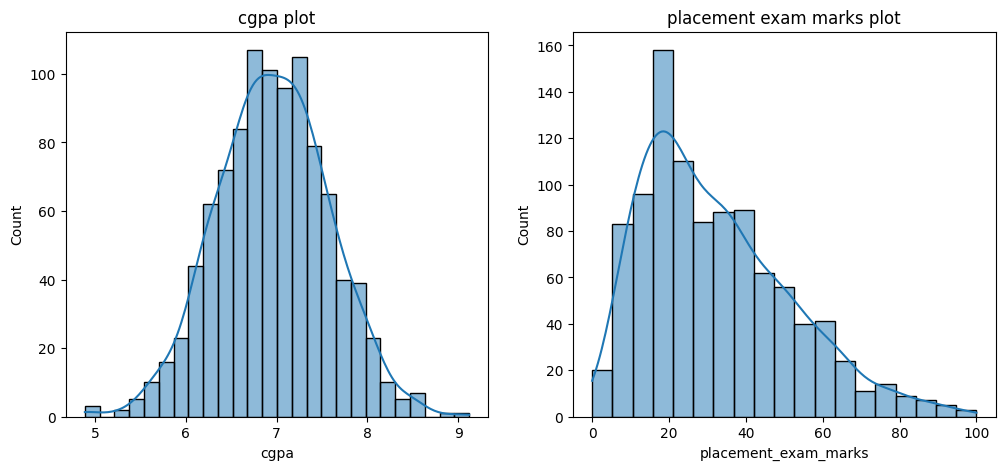

In [5]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))

# Distribution of cgpa marks
sns.histplot(df["cgpa"], kde=True, ax=ax1)
ax1.set_title("cgpa plot")

# Distribution of placement_exam_marks 
sns.histplot(df["placement_exam_marks"], kde=True, ax=ax2)
ax2.set_title("placement exam marks plot")
plt.show()

### `cgpa column` is normally distributed and `placement-exam-marks` is not normally distributed, so we can apply z-score technique on only cgpa column

In [6]:
df.duplicated().sum()

19

In [7]:
df.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.225000,0.489000
std,0.615898,19.130822,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,100.000000,1.000000


In [8]:
# Finding the boundries
print("Highest allowed : ",df["cgpa"].mean()+3*df["cgpa"].std()) #Formula: mean+3(standard deviation)
print("Lowest allowed : ",df["cgpa"].mean()-3*df["cgpa"].std())  #Formula: mean-3(standard deviation)

Highest allowed :  8.808933625397168
Lowest allowed :  5.113546374602832


In [9]:
# Finding the outliers
df.loc[((df['cgpa']>8.80) | (df['cgpa']<5.11)), :]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


# Trimming

In [10]:
new_df = df.loc[((df['cgpa']<8.80) & (df['cgpa']>5.11)), :]

In [11]:
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


In [12]:
# Approach 2
df["cgpa_zscore"] = (df['cgpa']-df['cgpa'].mean())/df['cgpa'].std()

In [13]:
df.head(3)

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701


In [14]:
df[df['cgpa_zscore']<-3]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [15]:
df[df['cgpa_zscore']<-3]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [16]:
new_df = df.loc[(df['cgpa_zscore']<-3) | (df['cgpa_zscore']>3)]
new_df

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [17]:
new_df2 = df.loc[(df['cgpa_zscore']>-3) & (df['cgpa_zscore']<3)]
new_df2

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
991,7.04,57.0,0,0.127878
992,6.26,12.0,0,-1.138565
993,6.73,21.0,1,-0.375452
994,6.48,63.0,0,-0.781363


# Capping

In [18]:
highest_value = df['cgpa'].mean()+3*df['cgpa'].std()
lowest_value = df['cgpa'].mean()-3*df['cgpa'].std()

In [19]:
highest_value, lowest_value

(8.808933625397168, 5.113546374602832)

In [20]:
df['cgpa'] = np.where(
    df['cgpa']>highest_value,
    highest_value,
    np.where(
        df['cgpa']<lowest_value,
        lowest_value,
        df['cgpa']
    )
)

In [21]:
df['cgpa'].describe()

count    1000.000000
mean        6.961499
std         0.612688
min         5.113546
25%         6.550000
50%         6.960000
75%         7.370000
max         8.808934
Name: cgpa, dtype: float64

# check this method on `skewed distributed data`

<Axes: >

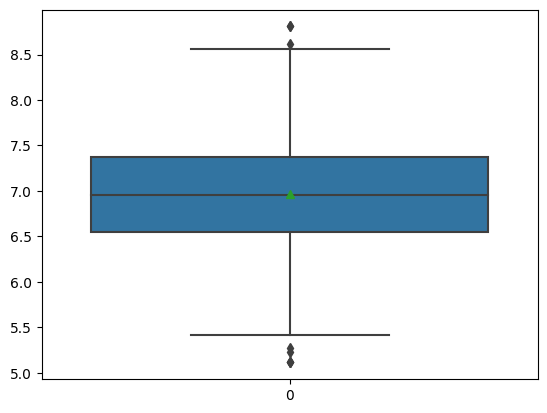

In [22]:
sns.boxplot(df['cgpa'], showmeans=True)

In [23]:
Q1 = df['cgpa'].quantile(0.25)
Q3 = df['cgpa'].quantile(0.75)
iqr = Q3-Q1

In [24]:
lower_limit = Q1-1.5*iqr
upper_limit = Q3+1.5*iqr

In [25]:
lower_limit, upper_limit

(5.319999999999999, 8.600000000000001)

In [26]:
df.loc[df['cgpa']<5.3, :]

,cgpa,placement_exam_marks,placed,cgpa_zscore
278,5.230000,17.0,1,-2.810921
485,5.113546,44.0,1,-3.314251
815,5.270000,43.0,0,-2.745975
997,5.113546,34.0,0,-3.362960
999,5.113546,10.0,1,-3.346724


In [28]:
df.loc[df['cgpa']>8.60, :]

,cgpa,placement_exam_marks,placed,cgpa_zscore
995,8.808934,44.0,1,3.099150
996,8.808934,65.0,1,3.505062
998,8.620000,46.0,1,2.693239


### Outcome:

`Normally Distributed Data` is dealed with method of `z-score` but here I try to apply `iqr method` on normally distributed data and results was rarely impacted. With z-score method, the outliers that was detected in data was `5 rows` but with iqr method, results was consist of `8 rows`.